In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

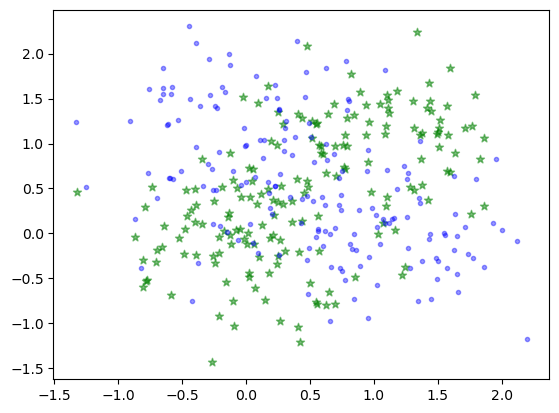

In [29]:
mean1=(0,0)
mean2=(0,1)
mean3=(1,0)
mean4=(1,1)
variance=0.3
covarience_matrix = np.array([[variance , 0],[0, variance]])
#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
import numpy as np

# Assuming you have mean1, mean2, mean3, mean4, covarience_matrix defined

# Generate samples
sample1 = np.random.multivariate_normal(mean1, covarience_matrix, size=90)
sample2 = np.random.multivariate_normal(mean2, covarience_matrix, size=90)
sample3 = np.random.multivariate_normal(mean3, covarience_matrix, size=90)
sample4 = np.random.multivariate_normal(mean4, covarience_matrix, size=90)

# Generate training data
indices1 = np.random.choice(len(sample1), 30, replace=False)
indices2 = np.random.choice(len(sample2), 30, replace=False)
indices3 = np.random.choice(len(sample3), 30, replace=False)
indices4 = np.random.choice(len(sample4), 30, replace=False)

Train_1 = sample1[indices1]
Train_2 = sample2[indices2]
Train_3 = sample3[indices3]
Train_4 = sample4[indices4]

classTra_1 = np.concatenate((Train_1, Train_4))
classTra_2 = np.concatenate((Train_3, Train_2))

# Generate testing data by selecting the remaining samples
Test_1_indices = np.setdiff1d(np.arange(90), indices1)
Test_2_indices = np.setdiff1d(np.arange(90), indices2)
Test_3_indices = np.setdiff1d(np.arange(90), indices3)
Test_4_indices = np.setdiff1d(np.arange(90), indices4)

Test_1 = sample1[Test_1_indices[:60]]
Test_2 = sample2[Test_2_indices[:60]]
Test_3 = sample3[Test_3_indices[:60]]
Test_4 = sample4[Test_4_indices[:60]]

classTes_1 = np.concatenate((Test_1, Test_4))
classTes_2 = np.concatenate((Test_3, Test_2))

class_1 = np.concatenate((classTra_1, classTes_1))
class_2 = np.concatenate((classTra_2, classTes_2))

#Visualize the data using plt.scatter() function
plt.scatter(class_1[:,0],class_1[:,1],label = "+1",color = 'green',marker='*',alpha=0.5)
plt.scatter(class_2[:,0],class_2[:,1],label = "-1",color = 'blue',marker='.',alpha=0.4)
N = len(classTes_1)+len(classTes_2)


Accuracy = 67.5


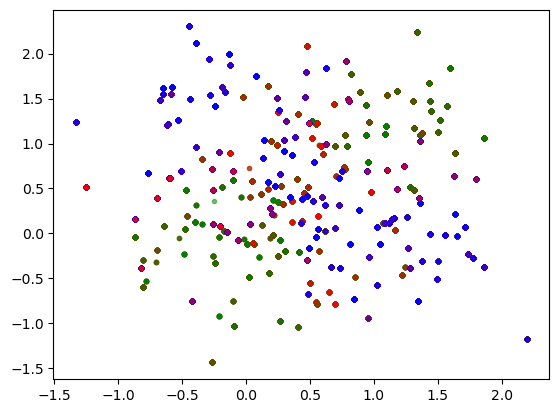

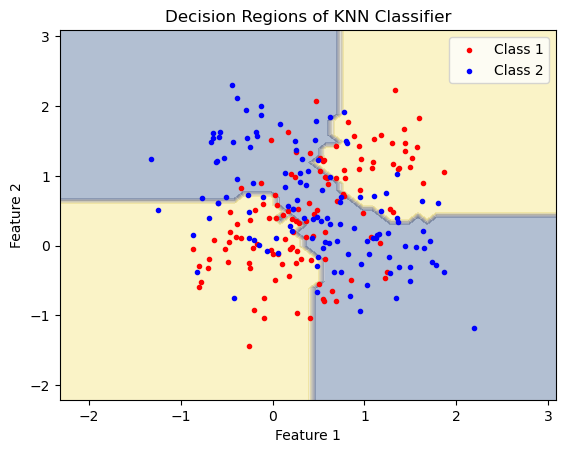

In [30]:
# @title Default title text
from ctypes import sizeof
########################################
#Part(b) #KNN classification
########################################
def d1(x1,x2,y1,y2):
  return abs(x1-x2)+abs(y1-y2)
#Write "kNNClassify" function
def kNNClassify(X_train,Y_train,X_test,k):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''

  Predict_labels=[]
  for i in range(len(X_test)):
   diff = []
   for j in range(len(X_train)):
     diff.append((d1(X_test[i][0],X_train[j][0],X_test[i][1],X_train[j][1])))
   sorted_array = np.sort(diff)
   c1 = 0
   c2 = 0
   for l in range(k):
     for p in range(len(X_train)):
       if(sorted_array[l] == diff[p]):
         if((Y_train[p]) == "+1"):
           c1 = c1 + 1
         elif(Y_train[p] == "-1"):
           c2 = c2 + 1
   if c1 > c2:
     Predict_labels.append("+1")
   else :
     Predict_labels.append("-1")
  return Predict_labels
k = 29
Training_data = np.concatenate((classTra_1,classTra_2))
Testing_data = np.concatenate((classTes_1,classTes_2))

Train_labels=[]
for i in Training_data:
 if i in classTra_1:
  Train_labels.append("+1")
 else:
  Train_labels.append("-1")

Original_labels=[]
for i in Testing_data:
  if i in classTes_1:
    Original_labels.append("+1")
  else:
    Original_labels.append("-1")

Predicted_labels = kNNClassify(Training_data,Train_labels,Testing_data,k)

#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''
  count1 = 0
  for i in range(len(pred)):
   if pred[i] == true[i]:
    count1 = count1 + 1
  accuracy = count1/len(pred)

  return(accuracy*100)

#Create a visual representation of predictions

for i in range(240):
  if Original_labels[i] == Predicted_labels[i]:
    if Testing_data[i] in classTes_1:
      plt.scatter(Testing_data[i:,0],Testing_data[i:,1],label = "+1",color = 'green',marker='.',alpha=0.5)
    else :
      plt.scatter(Testing_data[i:,0],Testing_data[i:,1],label = "-1",color = 'blue',marker='.',alpha=0.5)
  else:
    plt.scatter(Testing_data[i:,0],Testing_data[i:,1],label = "0",color = 'red',marker='.',alpha=0.5)

  acc = KNNAccuracy(Predicted_labels,Original_labels)

print(f"Accuracy = {acc}")
plt.show()
#Visuilization of decision region
all_data = np.concatenate((classTra_1, classTra_2))

x_min, x_max = all_data[:, 0].min() - 1, all_data[:, 0].max() + 1
y_min, y_max = all_data[:, 1].min() - 1, all_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

# Make predictions for the grid
yhat = np.array(kNNClassify(Training_data, Train_labels, grid, k))

# Reshape predictions to match the shape of xx and yy
zz = yhat.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, zz, cmap='cividis', alpha=0.3)

# Plot the data points
plt.scatter(classTes_1[:, 0], classTes_1[:, 1], c='red', marker='.', label='Class 1')
plt.scatter(classTes_2[:, 0], classTes_2[:, 1], c='blue', marker='.', label='Class 2')

plt.title('Decision Regions of KNN Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


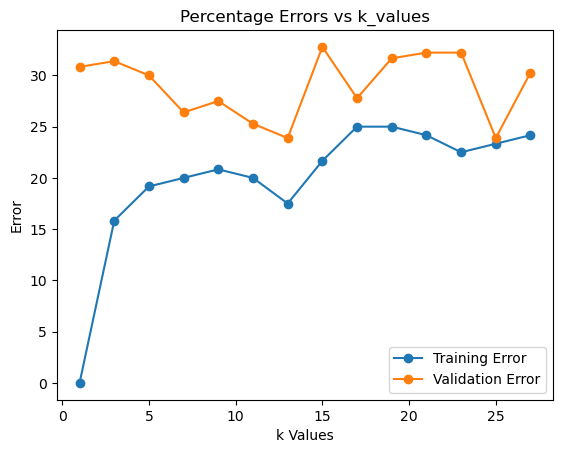

Here the best value is obtained as :13


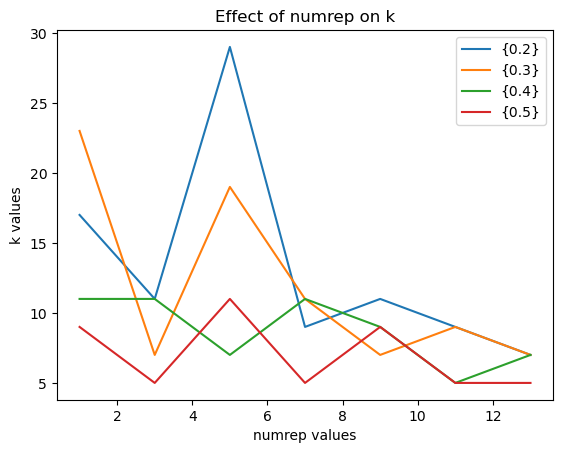

Plot above shows how rho and numrep varies on k
Large number of repetations provide most likely value of k
Performance on the test set with best k: {71.66666666666667}
Yes,there is an improvement w.r.t to part 2


In [31]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNNV(k_range,numrep,rho,Training_data):
  j = 0;
  Validation_error=[]
  Training_error=[]
  for k in range(1,k_range,2):
    accuracy=[]
    for i in range(numrep):
      n = int(rho*120)
      indices=np.random.choice(120,size=n)
      Test_DS = Training_data[indices]
      Test_1_indices = np.setdiff1d(np.arange(120), indices)
      Train_DS = Training_data[Test_1_indices[:120-n]]
      #Train_DS = Training_data
      Train_lab=[]
      for i in range(len(Train_DS)):
        if Train_DS[i] in class_1:
          Train_lab.append("+1")
        else:
          Train_lab.append("-1")
      Predicted_labels_DS = kNNClassify(Train_DS,Train_lab,Test_DS,k)
      Original_labels_DS=[]
      for i in Test_DS:
        if i in classTra_1:
           Original_labels_DS.append("+1")
        else:
          Original_labels_DS.append("-1")

      accuracy.append(KNNAccuracy(Original_labels_DS,Predicted_labels_DS))

    Validation_error.append(100 - sum(accuracy)/len(accuracy))

  return Validation_error;

def holdoutCVkNNT(k_range,numrep,rho,Training_data):
  j = 0;
  Training_error=[]
  for k in range(1,k_range,2):
    accuracy=[]
    for i in range(numrep):
      Train_DS = Training_data
      Train_lab=[]
      for i in range(len(Train_DS)):
        if Train_DS[i] in class_1:
          Train_lab.append("+1")
        else:
          Train_lab.append("-1")
      Predicted_labels_DS = kNNClassify(Train_DS,Train_lab,Train_DS,k)
      Original_labels_DS=[]
      for i in Train_DS:
        if i in classTra_1:
           Original_labels_DS.append("+1")
        else:
          Original_labels_DS.append("-1")

      accuracy.append(KNNAccuracy(Original_labels_DS,Predicted_labels_DS))
    Training_error.append(100-sum(accuracy)/len(accuracy))
  return Training_error;

  #Return errors on training and validation data
k=29
training_errors=holdoutCVkNNT(k,10,0.3,Training_data)
validation_errors=holdoutCVkNNV(k,10,0.3,Training_data)
k_values = np.arange(1,k, 2)
#Plot training and validation errors for different values of k
plt.plot(k_values, training_errors, label='Training Error', marker='o')
plt.plot(k_values, validation_errors, label='Validation Error', marker='o')
plt.title('Percentage Errors vs k_values')
plt.xlabel('k Values')
plt.ylabel('Error')
plt.legend()
plt.show()


min_error = min(validation_errors)
min_index = validation_errors.index(min_error)
k_min = 2*min_index+1

# # #what is the best value for k?
print(f'Here the best value is obtained as :{k_min}')
# """
"""This can be identified from the graph where the validation performance is good
I took range of k(1,3,....,29) : By performing cross-validation

"""
#Effect of rho and number repetations on k
rhoa=[0.2,0.3,0.4,0.5]
numrepa=np.arange(1,15,2)
for i in range(len(rhoa)):
  good_k=[]
  for j in range(len(numrepa)):
    validaerr = holdoutCVkNNV(60,numrepa[j],rhoa[i],Training_data)
    
    good_k.append(2*validaerr.index(min(validaerr))+1)
  plt.plot(numrepa,good_k,label={rhoa[i]})
plt.title('Effect of numrep on k')
plt.xlabel('numrep values')
plt.ylabel('k values')
plt.legend()
plt.show()
print("Plot above shows how rho and numrep varies on k")
print("Large number of repetations provide most likely value of k")
#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
Predicted_labels = kNNClassify(Training_data,Train_labels,Testing_data,k_min)
acc = KNNAccuracy(Predicted_labels,Original_labels)
print('Performance on the test set with best k:',{acc})
print("Yes,there is an improvement w.r.t to part 2")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Preformance of the sample decreases as n increases


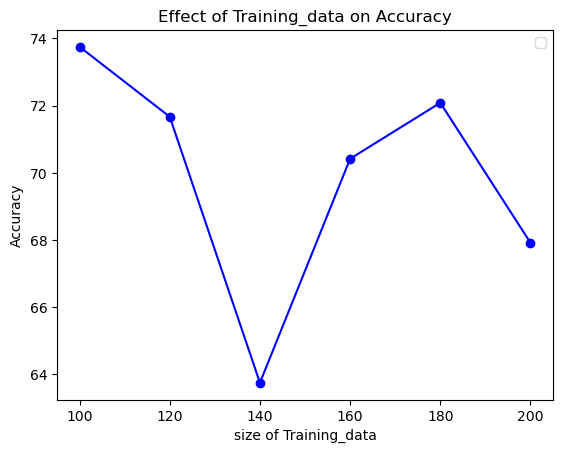

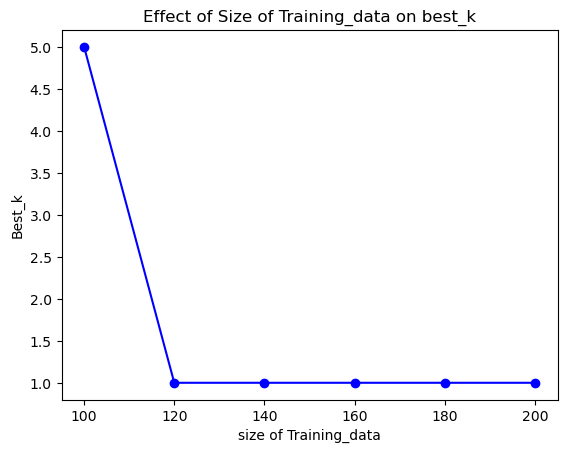

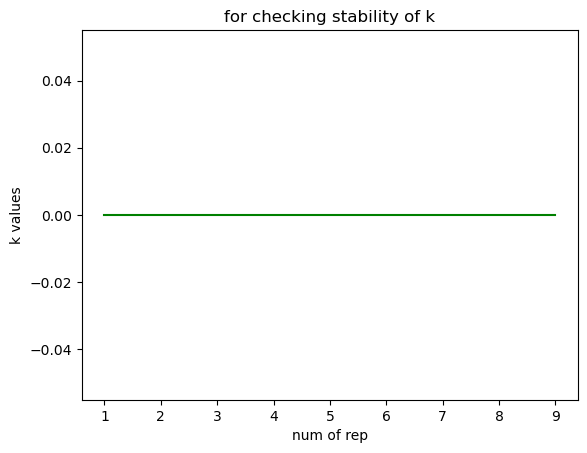

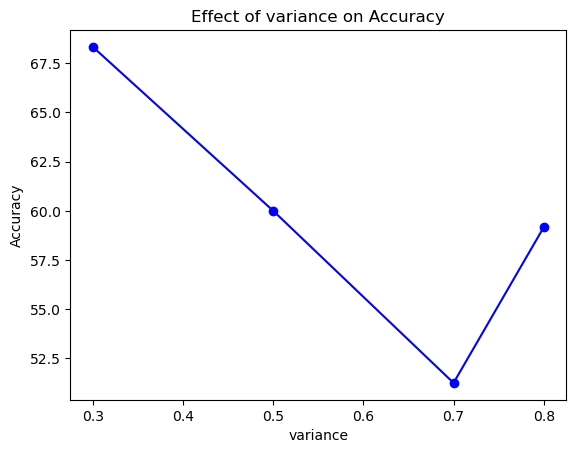

In [37]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases
mean1=(0,0)
mean2=(0,1)
mean3=(1,0)
mean4=(1,1)
variance=0.3
rho = 0.3
covarience_matrix = np.array([[variance,0],[0,variance]])
num = [100,120,140,160,180,200]
acc1=[]
k_min=[]
# Generate samples
for i in range(len(num)):

  sample1 = np.random.multivariate_normal(mean1, covarience_matrix, size=num[i])
  sample2 = np.random.multivariate_normal(mean2, covarience_matrix, size=num[i])
  sample3 = np.random.multivariate_normal(mean3, covarience_matrix, size=num[i])
  sample4 = np.random.multivariate_normal(mean4, covarience_matrix, size=num[i])

  indices1 = np.random.choice(len(sample1),num[i]-60, replace=False)
  indices2 = np.random.choice(len(sample2),num[i]-60, replace=False)
  indices3 = np.random.choice(len(sample3),num[i]-60, replace=False)
  indices4 = np.random.choice(len(sample4),num[i]-60, replace=False)

  Train_1 = sample1[indices1]
  Train_2 = sample2[indices2]
  Train_3 = sample3[indices3]
  Train_4 = sample4[indices4]

  classTra_1 = np.concatenate((Train_1, Train_4))
  classTra_2 = np.concatenate((Train_3, Train_2))

  Test_1_indices = np.setdiff1d(np.arange(num[i]), indices1)
  Test_2_indices = np.setdiff1d(np.arange(num[i]), indices2)
  Test_3_indices = np.setdiff1d(np.arange(num[i]), indices3)
  Test_4_indices = np.setdiff1d(np.arange(num[i]), indices4)

  Test_1 = sample1[Test_1_indices[:60]]
  Test_2 = sample2[Test_2_indices[:60]]
  Test_3 = sample3[Test_3_indices[:60]]
  Test_4 = sample4[Test_4_indices[:60]]

  classTes_1 = np.concatenate((Test_1, Test_4))
  classTes_2 = np.concatenate((Test_3, Test_2))

  Training_data = np.concatenate((classTra_1,classTra_2))
  Testing_data = np.concatenate((classTes_1,classTes_2))
  Original_labels=[]
  for i in Testing_data:
    if i in classTes_1:
      Original_labels.append("+1")
    else:
      Original_labels.append("-1")
  Train_labels=[]
  for i in Training_data:
    if i in classTra_1:
      Train_labels.append("+1")
    else:
      Train_labels.append("-1")
  Predicted_labels = kNNClassify(Training_data,Train_labels,Testing_data,29)
  acc = KNNAccuracy(Predicted_labels,Original_labels)
  acc1.append(acc)
  validation_errors = holdoutCVkNNV(29, 10,0.3,Training_data)
  min_error = min(validation_errors)
  min_index = validation_errors.index(min_error)
  k_min.append(2 * min_index + 1)

print("Preformance of the sample decreases as n increases")

plt.plot(num,acc1,'bo',linestyle='-')
plt.xlabel("size of Training_data")
plt.ylabel("Accuracy")
plt.title("Effect of Training_data on Accuracy")
plt.legend()
plt.show()
plt.plot(num,k_min,'bo',linestyle='-')
plt.xlabel("size of Training_data")
plt.ylabel("Best_k")
plt.title("Effect of Size of Training_data on best_k")
plt.show()
#Stability of solution
ks=[]
n=[1,2,3,4,5,6,7,8,9]
for i in range(9):
    vadlerr=holdoutCVkNNV(29,10,rho,Training_data)
    min_error=min(vadlerr)
    min_index = vadlerr.index(min_error)
    ks.append(min_index)

plt.plot(n,ks,color='green',linestyle='-')
plt.xlabel("num of rep")
plt.ylabel("k values")
plt.title("for checking stability of k")
plt.show()

variance=[0.3,0.5,0.7,0.8]
acc2=[]
for i in range(len(variance)):
  covarience_matrix = np.array([[variance[i] , 0],[0, variance[i]]])
  sample1 = np.random.multivariate_normal(mean1, covarience_matrix, size=90)
  sample2 = np.random.multivariate_normal(mean2, covarience_matrix, size=90)
  sample3 = np.random.multivariate_normal(mean3, covarience_matrix, size=90)
  sample4 = np.random.multivariate_normal(mean4, covarience_matrix, size=90)

  indices1 = np.random.choice(len(sample1), 30, replace=False)
  indices2 = np.random.choice(len(sample2), 30, replace=False)
  indices3 = np.random.choice(len(sample3), 30, replace=False)
  indices4 = np.random.choice(len(sample4), 30, replace=False)

  Train_1 = sample1[indices1]
  Train_2 = sample2[indices2]
  Train_3 = sample3[indices3]
  Train_4 = sample4[indices4]

  classTra_1 = np.concatenate((Train_1, Train_4))
  classTra_2 = np.concatenate((Train_3, Train_2))

  Test_1_indices = np.setdiff1d(np.arange(90), indices1)
  Test_2_indices = np.setdiff1d(np.arange(90), indices2)
  Test_3_indices = np.setdiff1d(np.arange(90), indices3)
  Test_4_indices = np.setdiff1d(np.arange(90), indices4)

  Test_1 = sample1[Test_1_indices[:60]]
  Test_2 = sample2[Test_2_indices[:60]]
  Test_3 = sample3[Test_3_indices[:60]]
  Test_4 = sample4[Test_4_indices[:60]]

  classTes_1 = np.concatenate((Test_1, Test_4))
  classTes_2 = np.concatenate((Test_3, Test_2))

  Training_data = np.concatenate((classTra_1,classTra_2))
  Testing_data = np.concatenate((classTes_1,classTes_2))
  Train_labels=[]
  for i in Training_data:
    if i in classTra_1:
      Train_labels.append("+1")
    else:
      Train_labels.append("-1")
  Original_labels_DS=[]
  for i in Testing_data:
    if i in classTes_1:
      Original_labels_DS.append("+1")
    else:
      Original_labels_DS.append("-1")
  Predicted_labels = kNNClassify(Training_data,Train_labels,Testing_data,29)
  acc2.append(KNNAccuracy(Predicted_labels,Original_labels))
plt.plot(variance,acc2,'bo',linestyle='-')
plt.xlabel("variance")
plt.ylabel("Accuracy")
plt.title("Effect of variance on Accuracy")
plt.show()

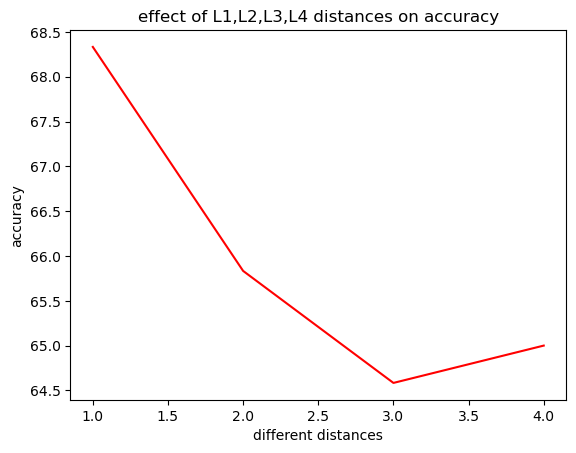

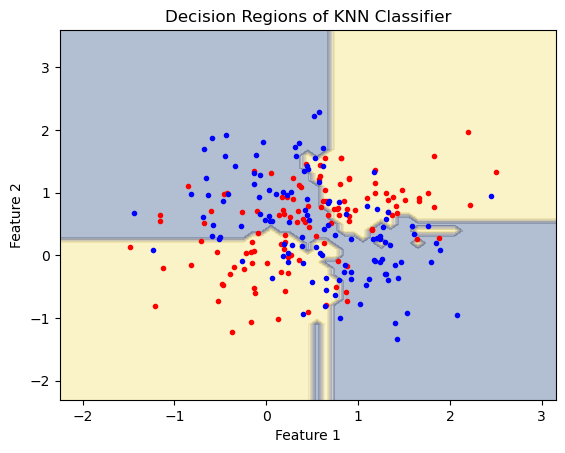

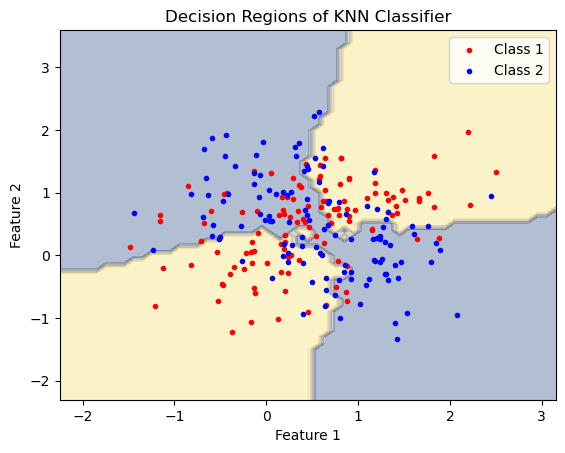

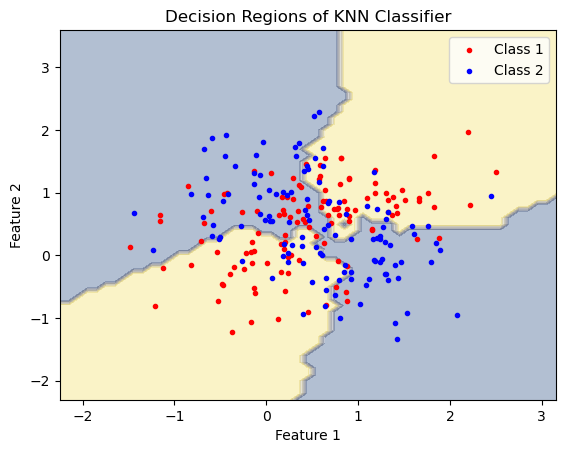

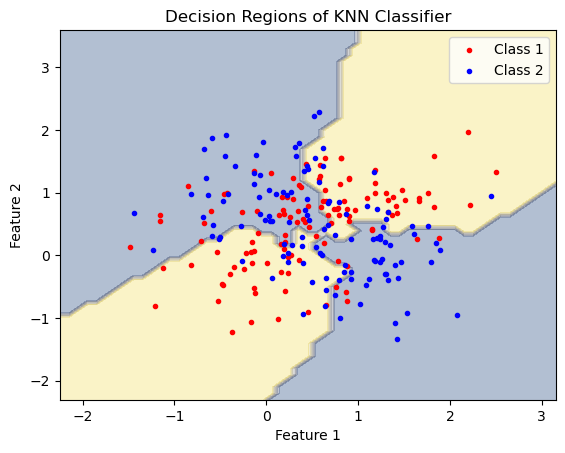

In [36]:
##################################
#Part(e): Influence of distance measure on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance measures
mean1=(0,0)
mean2=(0,1)
mean3=(1,0)
mean4=(1,1)
variance=0.3
covarience_matrix = np.array([[variance , 0],[0, variance]])
#Sample data points from the bivariate Gaussian distribution

# Generate samples
sample1 = np.random.multivariate_normal(mean1, covarience_matrix, size=90)
sample2 = np.random.multivariate_normal(mean2, covarience_matrix, size=90)
sample3 = np.random.multivariate_normal(mean3, covarience_matrix, size=90)
sample4 = np.random.multivariate_normal(mean4, covarience_matrix, size=90)

# Generate training data
indices1 = np.random.choice(len(sample1), 30, replace=False)
indices2 = np.random.choice(len(sample2), 30, replace=False)
indices3 = np.random.choice(len(sample3), 30, replace=False)
indices4 = np.random.choice(len(sample4), 30, replace=False)

Train_1 = sample1[indices1]
Train_2 = sample2[indices2]
Train_3 = sample3[indices3]
Train_4 = sample4[indices4]

classTra_1 = np.concatenate((Train_1, Train_4))
classTra_2 = np.concatenate((Train_3, Train_2))

# Generate testing data by selecting the remaining samples
Test_1_indices = np.setdiff1d(np.arange(90), indices1)
Test_2_indices = np.setdiff1d(np.arange(90), indices2)
Test_3_indices = np.setdiff1d(np.arange(90), indices3)
Test_4_indices = np.setdiff1d(np.arange(90), indices4)

Test_1 = sample1[Test_1_indices[:60]]
Test_2 = sample2[Test_2_indices[:60]]
Test_3 = sample3[Test_3_indices[:60]]
Test_4 = sample4[Test_4_indices[:60]]

classTes_1 = np.concatenate((Test_1, Test_4))
classTes_2 = np.concatenate((Test_3, Test_2))

Training_data = np.concatenate((classTra_1, classTra_2))
Testing_data = np.concatenate((classTes_1, classTes_2))
def d1(x1,x2,y1,y2):
  return abs(x1-x2)+abs(y1-y2);
def d2(x1,x2,y1,y2):
  return pow(((x1-x2)**2+(y1-y2)**2),0.5);
def d3(x1,x2,y1,y2):
  return pow((abs(x1-x2)**3+abs(y1-y2)**3),0.33)
def d4(x1,x2,y1,y2):
  return pow((abs(x1-x2)**4+abs(y1-y2)**4),0.25)
def kNNClassifyD(X_train,Y_train,X_test,k,d):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  Predict_labels=[]
  for i in range(len(X_test)):
   diff = []
   for j in range(len(X_train)):
     diff.append((d(X_test[i,0],X_train[j,0],X_test[i,1],X_train[j,1])))

   sorted_array = np.sort(diff)
   c1 = 0
   c2 = 0
   for l in range(k):
     for p in range(len(X_train)):
       if(sorted_array[l] == diff[p]):
         if((Y_train[p]) == "+1"):
           c1 = c1 + 1
         elif(Y_train[p] == "-1"):
           c2 = c2 + 1
   if c1 > c2:
     Predict_labels.append("+1")
   else :
     Predict_labels.append("-1")
  return Predict_labels
Original_labels=[]
for i in Testing_data:
  if i in classTes_1:
    Original_labels.append("+1")
  else:
    Original_labels.append("-1")
Train_labels=[]
for i in Training_data:
  if i in classTra_1:
    Train_labels.append("+1")
  else:
    Train_labels.append("-1")
k = 30
Predicted_labels1=kNNClassifyD(Training_data,Train_labels,Testing_data,k,d1)
Predicted_labels2=kNNClassifyD(Training_data,Train_labels,Testing_data,k,d2)
Predicted_labels3=kNNClassifyD(Training_data,Train_labels,Testing_data,k,d3)
Predicted_labels4=kNNClassifyD(Training_data,Train_labels,Testing_data,k,d4)
acc=[]
acc.append(KNNAccuracy(Original_labels,Predicted_labels1))
acc.append(KNNAccuracy(Original_labels,Predicted_labels2))
acc.append(KNNAccuracy(Original_labels,Predicted_labels3))
acc.append(KNNAccuracy(Original_labels,Predicted_labels4))
d=[1,2,3,4]
plt.plot(d,acc,color='red',linestyle='-')
plt.xlabel('different distances')
plt.ylabel('accuracy')
plt.title('effect of L1,L2,L3,L4 distances on accuracy')
plt.show()
#Understand the decision regions of KNN classifier with different distance measures
all_data = np.concatenate((classTra_1, classTra_2))

x_min, x_max = all_data[:, 0].min() - 1, all_data[:, 0].max() + 1
y_min, y_max = all_data[:, 1].min() - 1, all_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

# Make predictions for the grid
yhat = np.array(kNNClassifyD(Training_data,Train_labels,grid,k,d1))
# Reshape predictions to match the shape of xx and yy
zz = yhat.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, zz, cmap='cividis', alpha=0.3)

# Plot the data points
plt.scatter(classTes_1[:, 0], classTes_1[:, 1], c='red', marker='.', label='Class 1')
plt.scatter(classTes_2[:, 0], classTes_2[:, 1], c='blue', marker='.', label='Class 2')

plt.title('Decision Regions of KNN Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


yhat = np.array(kNNClassifyD(Training_data,Train_labels,grid,k,d2))

# Reshape predictions to match the shape of xx and yy
zz = yhat.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, zz, cmap='cividis', alpha=0.3)

# Plot the data points
plt.scatter(classTes_1[:, 0], classTes_1[:, 1], c='red', marker='.', label='Class 1')
plt.scatter(classTes_2[:, 0], classTes_2[:, 1], c='blue', marker='.', label='Class 2')

plt.title('Decision Regions of KNN Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# Make predictions for the grid
yhat = np.array(kNNClassifyD(Training_data,Train_labels,grid,k,d3))

# Reshape predictions to match the shape of xx and yy
zz = yhat.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, zz, cmap='cividis', alpha=0.3)

# Plot the data points
plt.scatter(classTes_1[:, 0], classTes_1[:, 1], c='red', marker='.', label='Class 1')
plt.scatter(classTes_2[:, 0], classTes_2[:, 1], c='blue', marker='.', label='Class 2')

plt.title('Decision Regions of KNN Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# Make predictions for the grid
yhat = np.array(kNNClassifyD(Training_data,Train_labels,grid,k,d4))

# Reshape predictions to match the shape of xx and yy
zz = yhat.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, zz, cmap='cividis', alpha=0.3)

# Plot the data points
plt.scatter(classTes_1[:, 0], classTes_1[:, 1], c='red', marker='.', label='Class 1')
plt.scatter(classTes_2[:, 0], classTes_2[:, 1], c='blue', marker='.', label='Class 2')

plt.title('Decision Regions of KNN Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [15]:
# Report of e): for the l1,l2,l3,l4 distances ,the accuracy increases from l1 to l4
#There is very slight change in the decision regions
#points marked are test points 

83.0
1
Best performance on validation 82.0


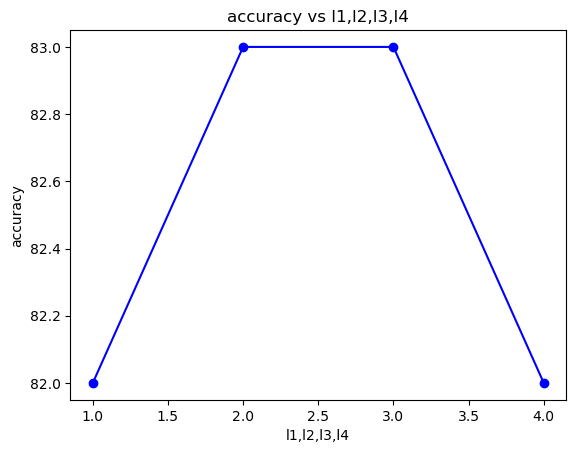

Accuracy for best k on test data 90.0
[[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  6.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  8.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  9.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0. 12.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 18.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  6.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]


'Weighted Voting:\n\nImplement weighted voting, where closer neighbors have a higher influence on the prediction.\nWeighted KNN assigns weights to the contributions of each neighbor based on their distance.\n\nfor ex: if you want to test on particular test value say for example(2,3) it is nearer to (3,3)\nrather than (4,4) so contribution of (3,3)->(let it has contribution 2)should be more than (4,4)->(only 1 type) \n'

In [14]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)
#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()

# Plot a few images with their corresponding target classes
# plt.subplot(211)
# plt.imshow(images[0].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
# plt.title(f"Class: {int(targets[0])}")  # Display the target class as a title

# plt.subplot(212)
# plt.imshow(images[1].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
# plt.title(f"Class: {int(targets[1])}")  # Display the target class as a title

# plt.show()
n = 1000
train_size = int(0.8 * n)
validation_size = int(0.1 * n)
test_size = n - train_size - validation_size

# Split the dataset
train = images[:train_size]
train_labels = targets[:train_size]

validation = images[train_size:train_size + validation_size]
validation_labels = targets[train_size:train_size + validation_size]

test = images[train_size + validation_size:n]
test_labels = targets[train_size + validation_size:n]

# #Write 'MultiClassKNNClassify' function
import numpy as np

def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def MultiClassKNNClassify(train, train_labels, test, k,d):
    PredictTest = []

    for i in range(len(test)):
        diff = []
        unique_labels = list(set(train_labels))
        labels = [0] * len(unique_labels)

        for j in range(len(train)):
            diff.append((d(train[j], test[i])))

        indices = np.argsort(diff)[:k]

        # Convert labels to integers
        label_indices = [unique_labels.index(train_labels[index]) for index in indices]

        # Count the occurrences of each label among the k nearest neighbors
        for index in label_indices:
            labels[index] += 1

        # Find the label with the maximum count
        predicted_label_index = np.argmax(labels)
        predicted_label = unique_labels[predicted_label_index]
        PredictTest.append(predicted_label)

    return PredictTest


def MKnnAccuracy(true,pred):
   count = 0
   for i in range(len(true)):
     if pred[i] == true[i]:
         count=count+1
   return (count*100)/len(true)

# #Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.

k = 20
Predicted_labels = MultiClassKNNClassify(train,train_labels,test,k,euclidean_distance)
acc = MKnnAccuracy(test_labels,Predicted_labels)
print(acc)
# #Empirically chose most suitable k and error function based on the evauation on cross-validation data
def holdoutCVkNNVMM(k_range,numrep,rho,train,train_labels,validation,validation_labels):
   j = 0;
   Validation_error=[]
   for k in range(1,k_range,2):
     accuracy=[]
     for i in range(numrep):
       n = int(rho*len(train))
       Test_DS = validation
       Train_DS = train
       Predicted_labels_DS = MultiClassKNNClassify(Train_DS,train_labels,Test_DS,k,euclidean_distance)

       accuracy.append(MKnnAccuracy(validation_labels,Predicted_labels_DS))

     Validation_error.append(100 - sum(accuracy)/len(accuracy))

   return Validation_error;

validation_errors=holdoutCVkNNVMM(9,10,0.3,train,train_labels,validation,validation_labels)
k_min = 2*(validation_errors.index(min(validation_errors)))+1
print(k_min)
Predicted_labelsV = MultiClassKNNClassify(train,train_labels,validation,k,euclidean_distance)
accV = MKnnAccuracy(validation_labels,Predicted_labelsV)
print(f"Best performance on validation {accV}")

# #Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.
def l1_distance(vector1, vector2):
    return np.power(np.sum(np.abs(vector1 - vector2)**1), 1/1);
def l2_distance(vector1, vector2):
    return np.power(np.sum(np.abs(vector1 - vector2)**2), 1/2);
def l3_distance(vector1, vector2):
    return np.power(np.sum(np.abs(vector1 - vector2)**3), 1/3);
def l4_distance(vector1, vector2):
    return np.power(np.sum(np.abs(vector1 - vector2)**4), 1/4);

Predicted_labelsM1 = MultiClassKNNClassify(train, train_labels, test, k,l1_distance)
Predicted_labelsM2 = MultiClassKNNClassify(train, train_labels, test, k,l2_distance)
Predicted_labelsM3 = MultiClassKNNClassify(train, train_labels, test, k,l3_distance)
Predicted_labelsM4 = MultiClassKNNClassify(train, train_labels, test, k,l4_distance)
acc = []
acc.append(MKnnAccuracy(test_labels,Predicted_labelsM1))
acc.append(MKnnAccuracy(test_labels,Predicted_labelsM2))
acc.append(MKnnAccuracy(test_labels,Predicted_labelsM3))
acc.append(MKnnAccuracy(test_labels,Predicted_labelsM4))
num = [1,2,3,4]
plt.plot(num,acc,'bo',linestyle='-')
plt.xlabel("l1,l2,l3,l4")
plt.ylabel("accuracy")
plt.title("accuracy vs l1,l2,l3,l4")
plt.show()
#Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation
Predicted_labels = MultiClassKNNClassify(train, train_labels, test, k_min,l1_distance)
acc = MKnnAccuracy(test_labels,Predicted_labels)

print(f"Accuracy for best k on test data {acc}")

 #Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    cm = np.zeros((10, 10))
    for i in range(len(true)):
        # Convert string values to integers
        true_class = int(true[i])
        pred_class = int(pred[i])
        
        cm[true_class][pred_class] += 1

    return cm

cm = compute_confusion_matrix(test_labels,Predicted_labels) 
print(cm)



#Suggest an alternative ways to improve performance

"""Weighted Voting:

Implement weighted voting, where closer neighbors have a higher influence on the prediction.
Weighted KNN assigns weights to the contributions of each neighbor based on their distance.

for ex: if you want to test on particular test value say for example(2,3) it is nearer to (3,3)
rather than (4,4) so contribution of (3,3)->(let it has contribution 2)should be more than (4,4)->(only 1 type) 
"""



In [ ]:
""" Observations 
1).Best Performance on the test set : {71.25}
2).Best Performance on the validation set : {84}
   Best Performance on the test set : {90}
3). Confusion matrix is the matrix which has more elements on the diagonals 
i.e, accuracy is high i.e, similarity is more and less differences
"""